In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("http://51.91.120.89/extras/iris.csv")
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
df["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [19]:
df["class_value"] = df["class"].map({
    "Iris-setosa" : 0, "Iris-versicolor" : 1, "Iris-virginica":2
})

In [20]:
df["class_value"].value_counts()

0    50
1    50
2    50
Name: class_value, dtype: int64

<AxesSubplot:xlabel='sepallength', ylabel='sepalwidth'>

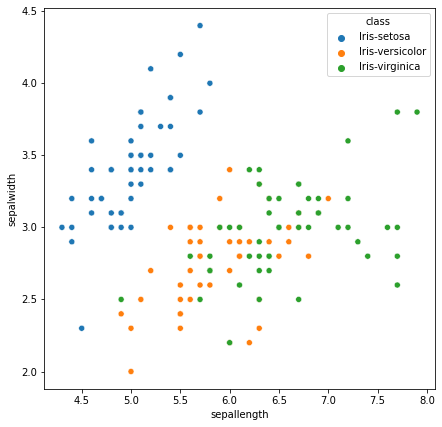

In [21]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="sepallength", y='sepalwidth', hue="class")

<AxesSubplot:xlabel='petallength', ylabel='petalwidth'>

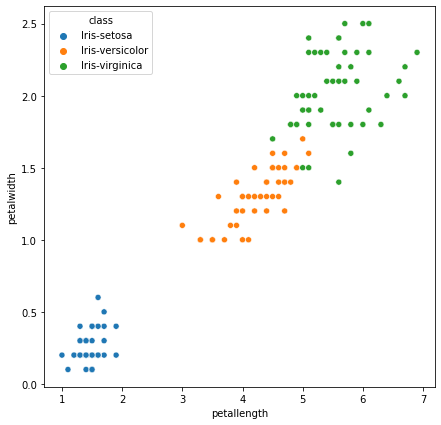

In [22]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="petallength", y='petalwidth', hue="class")

<AxesSubplot:>

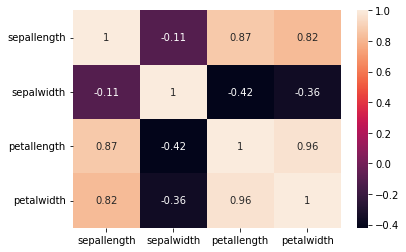

In [23]:
sns.heatmap( df.iloc[:, :4].corr() , annot=True)

In [24]:
#!pip install mlxtend -q
#!pip install dtreeplt -q

In [25]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
from dtreeplt import dtreeplt

In [32]:
X = df[ ["sepallength","sepalwidth"] ]
#X = df[ ["petallength","petalwidth"] ]
y = df.class_value

In [33]:
model = RandomForestClassifier(max_depth=11, random_state=0)
model.fit(X, y)

RandomForestClassifier(max_depth=11, random_state=0)

<AxesSubplot:>

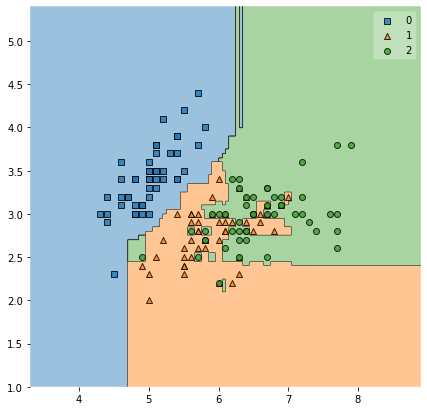

In [34]:
plt.figure(figsize=(7,7))
plot_decision_regions(X.values, y.values, model)

In [35]:
X = df.iloc[: , :4]
y = df.class_value

model = RandomForestClassifier(max_depth=11, random_state=0)
model.fit(X, y)

RandomForestClassifier(max_depth=11, random_state=0)

In [36]:
pd.DataFrame( model.feature_importances_ , X.columns ).sort_values(0, ascending=False)

,0
petallength,0.460445
petalwidth,0.424116
sepallength,0.090908
sepalwidth,0.024531


In [37]:
df.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class',
       'class_value'],
      dtype='object')